In [1]:
import pandas as pd

In [2]:
# loading data
data = pd.read_csv('Air_Passengers.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
# convert month column into datetime type
date = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Air_Passengers.csv', parse_dates=['Month'], index_col='Month', date_parser=date)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
time_series = data["#Passengers"]

In [8]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

c:\users\adisa\adisakshya\projects\time-series-regression\venv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


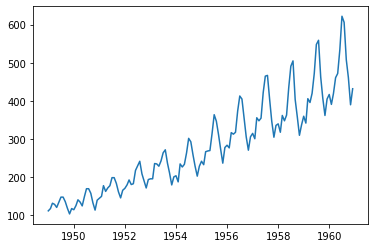

In [9]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(time_series)

In [10]:
def rolling_statistics_test(time_series):
    
    # rolling statistics
    # rolling window = 12 months (1 year)
    rolling_mean = time_series.rolling(window = 12, center = False).mean()
    rolling_std = time_series.rolling(window = 12, center = False).std()
    
    # plot rolling statistics
    plt.plot(time_series, color="blue", label="origin")
    plt.plot(rolling_mean, color="black", label="rolling_mean")
    plt.plot(rolling_std, color="red", label="rolling_std")
    plt.legend(loc="best")
    plt.title('Rolling Statistics')
    plt.show()

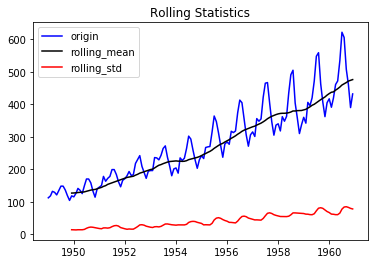

In [11]:
rolling_statistics_test(time_series)

In [12]:
# from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decompose

# def dickey_fuller_test(time_series):
    
#     df_test = adfuller(time_series, autolag="AIC")
#     df_output = pd.Series(df_test[0:4], index=['test_statistic','p_value','#lags_used','number_of_observations_used'])
    
#     for key, value in df_test[4].items():
#         df_output['critical_value(%s)'%key] = value
    
#     print(df_output)

In [13]:
# print("Results of Dickey Fuller Test")
# dickey_fuller_test(time_series)

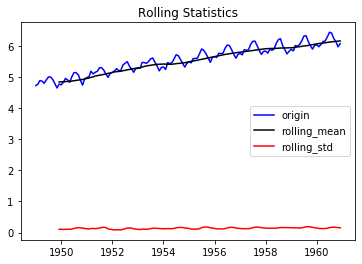

In [14]:
import numpy as np

# stabilizing variance with log transformation
time_series_log = np.log(time_series)
rolling_statistics_test(time_series_log)

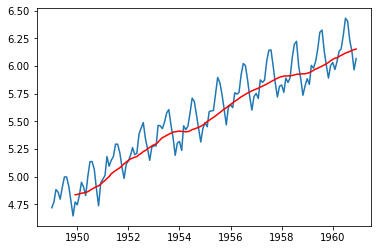

In [15]:
moving_avg = time_series_log.rolling(window=12,center=False).mean()
plt.plot(time_series_log)
plt.plot(moving_avg, color='red')

In [16]:
time_series_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

In [17]:
moving_avg

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    6.124517
1960-09-01    6.132246
1960-10-01    6.142628
1960-11-01    6.148837
1960-12-01    6.154215
Name: #Passengers, Length: 144, dtype: float64